<a href="https://colab.research.google.com/github/1997trina/HelloWorld/blob/master/Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

When you have many columns in your dataset, say, more than 10, the data is considered high dimensional. And if you're new to that dataset, it could be hard to find the most important patterns because of the complexity that comes with high-dimensionality. To overcome this, we can reduce the number of columns using dimensionality reduction techniques. However, these techniques can also be useful for relatively low dimensional datasets.

**Models tend to overfit badly on high-dimensional data.** **BUT WHAT IS OVERFITTING?**

Say we want to predict the city in which a house is located based on some features of that house. When we expand to 1000 observations per city the price distributions become clear and a model should be able to train on this data without overfitting. To test this assumption we'll build a model. But before we do so, we'll split the data into a 70% train and 30% test set using scikit learn's train_test_split() function. We'll then instantiate a classifier model, here we chose a support vector machine classifier, and fit it to the training data. Our model is able to assign 82.6% of unseen houses to the correct city. From our visual exploration, this could be expected since there was quite some overlap in the single feature our model was trained on.

If we want to know whether our model overfitted to the dataset we can have a look at the accuracy on the training set. If this accuracy is much higher than that on the test set we can conclude that the model didn't generalize well but simply memorized all training examples. If we want to improve the accuracy of our model, we'll have to add features to the dataset, so that in cases where the price of the house doesn't allow us to derive the location, something else will. Features like the number of floors, bathrooms, or surface area. Again, to avoid overfitting the number of observations should increase exponentially with the number of features. 










In [ ]:
dataset = 'Pokemon.csv'

In [ ]:
#Libraries
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
#for instantiating a classifier model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [ ]:
pokemon_df = pd.read_csv(dataset)
print(pokemon_df.shape)
pokemon_df.describe()

(1072, 13)


,number,total,hp,attack,defense,sp_attack,sp_defense,speed,generation
count,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000
mean,445.219216,440.885261,70.486940,80.938433,74.968284,73.273321,72.476679,68.792910,4.294776
std,267.772806,121.379077,26.868039,32.463582,31.208059,32.643119,27.934253,30.076281,2.346472
min,1.000000,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,0.000000
25%,209.750000,330.000000,50.000000,56.000000,52.000000,50.000000,50.000000,45.000000,2.000000
50%,442.500000,460.500000,68.000000,80.000000,70.000000,65.000000,70.000000,65.000000,4.000000
75%,681.250000,519.250000,84.000000,100.000000,90.000000,95.000000,90.000000,90.000000,6.000000
max,898.000000,1125.000000,255.000000,190.000000,250.000000,194.000000,250.000000,200.000000,8.000000


**REMOVING FEATURES WITHOUT VARIANCE**

1.   Columns having same min and max and 0 standard deviation can be dropped.Just make sure to pass the axis argument '1', to specify we're dropping a column instead of a row. 
2.   
Why reduce dimensionality?

Your dataset will become simpler and thus easier to work with, require less disk space to store and computations will run faster. In addition, models are less likely to overfit on a dataset with fewer dimensions. 



In [ ]:
non_num_col = ['name','type1','type2','legendary']

# **Visually detecting redundant features**

In [ ]:
iris = 'iris.csv'
iris_df = pd.read_csv('iris.csv')
iris_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


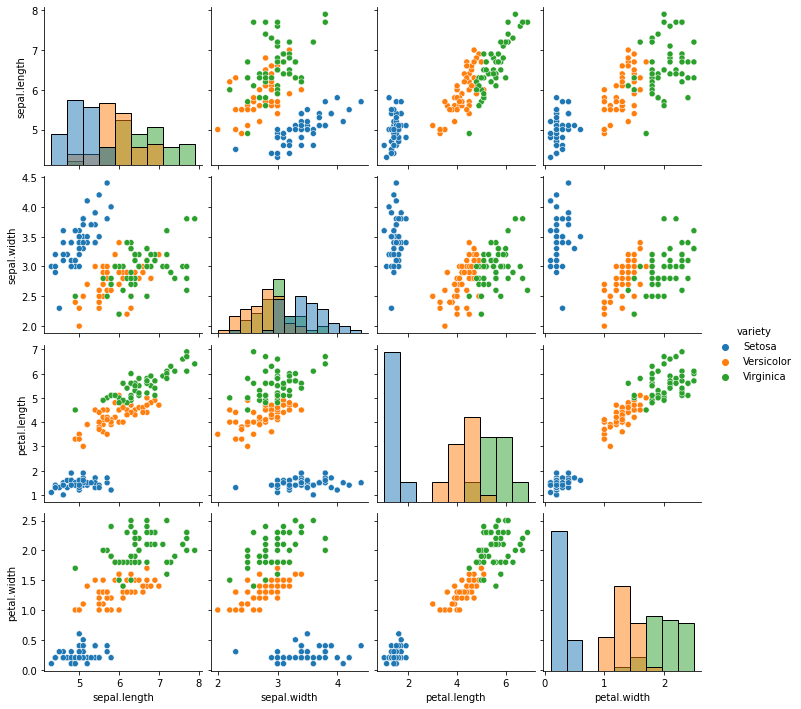

In [ ]:
# Create a pairplot and color the points using the 'Species' feature
sns.pairplot(iris_df, hue='variety', diag_kind='hist')

**Feature Extraction **
 performs the same role.Instead of selecting a subset of features from our initial dataset, we'll be calculating, or extracting, new features from the original ones. These new features have as little redundant information in them as possible and are therefore fewer in number. One downside is that the newly created features are often less intuitive to understand than the original ones.

# **t-SNE visualization of high-dimensional data **
 t-Distributed Stochastic Neighbor Embedding or t-SNE is a powerful technique to visualize high dimensional data using feature extraction. t-SNE will maximize the distance in two-dimensional space between observations that are most different in a high-dimensional space. 


In [ ]:
#STEP 1 : Remove non-numeric column
non_numeric = ['variety']
df_numeric = iris_df.drop(non_numeric, axis=1)

# What is learning rate?
The learning rate is a hyperparameter that controls how much to change the model in response to the estimated error each time the model weights are updated. The *learning rate* for t-SNE is usually in the range [10.0, 1000.0]. If the learning rate is too high, the data may look like a ‘ball’ with any point approximately equidistant from its nearest neighbours. If the learning rate is too low, most points may look compressed in a dense cloud with few outliers. If the cost function gets stuck in a bad local minimum increasing the learning rate may help. Note that many other t-SNE implementations (bhtsne, FIt-SNE, openTSNE, etc.) use a definition of learning_rate that is 4 times smaller than ours. So our learning_rate=200 corresponds to learning_rate=800 in those other implementations. The ‘auto’ option sets the learning_rate to max(N / early_exaggeration / 4, 50) where N is the sample size, following [4] and [5]. This will become default in 1.2

High learning rates will cause the algorithm to be more adventurous in the configurations it tries out while low learning rates will cause it to be conservative. Next, we'll fit and transform the TSNE model to our numeric dataset. This will project our high-dimensional dataset onto a NumPy array with two dimensions. 

In [ ]:
# Create a t-SNE model with learning rate 50
from sklearn.manifold import TSNE 
m = TSNE(learning_rate=50)

tsne_features = m.fit_transform(df_numeric)
print(tsne_features.shape)

(150, 2)


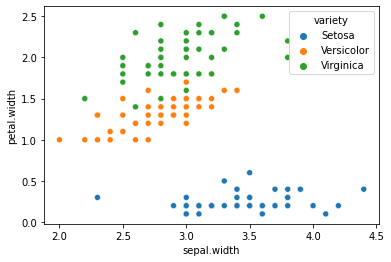

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Color the points according to Army Component
sns.scatterplot(x="sepal.width", y = "petal.width", hue="variety", data=iris_df)

# Show the plot
plt.show()

# **Train - test split**

In [ ]:
diabetes_df = pd.read_csv('/content/Diabetes.csv')
diabetes_df.head(20)

,pregnant,glucose,diastolic,triceps,insulin,bmi,family,age,test
0,1,89,66,23,94,28.1,0.167,21,negative
1,0,137,40,35,168,43.1,2.288,33,positive
2,3,78,50,32,88,31.0,0.248,26,positive
3,2,197,70,45,543,30.5,0.158,53,positive
4,1,189,60,23,846,30.1,0.398,59,positive
5,5,166,72,19,175,25.8,0.587,51,positive
6,0,118,84,47,230,45.8,0.551,31,positive
7,1,103,30,38,83,43.3,0.183,33,negative
8,1,115,70,30,96,34.6,0.529,32,positive
9,3,126,88,41,235,39.3,0.704,27,negative


In [ ]:

print(diabetes_df.shape)
# Select the test column as the feature to be predicted (y)
y = diabetes_df['test']
# Remove the test column to create the training data
X = diabetes_df.drop('test',1)
#perform 70% train and 30% test data split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
print("{} rows in test set vs. {} in training set. {} Features.".format(X_test.shape[0], X_train.shape[0], X_test.shape[1]))

(392, 9)
118 rows in test set vs. 274 in training set. 8 Features.


**Fitting and testing the model**

In [ ]:
#create instance of support vector machine
svc = SVC()
#fit the model into training data
svc.fit(X_train,y_train)
#Calculate accuracy score of both train and test data
accuracy_train = accuracy_score(y_test,svc.predict(X_test))
accuracy_test= accuracy_score(y_train, svc.predict(X_train))
print("{0:.1%} accuracy on test set vs. {1:.1%} on training set".format(accuracy_test, accuracy_train))

77.7% accuracy on test set vs. 78.0% on training set


**Dimensionality reduction by only selecting a single column that has some good information to distinguish between test results.**

** in this case this isn't working but it is a possible way out

In [ ]:
#Instead of the entire dataset, assign only the insulin column to x
X = diabetes_df[['pregnant']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
svc = SVC()
svc.fit(X_train, y_train)
# Calculate accuracy scores on both train and test data
accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))
print("{0:.1%} accuracy on test set vs. {1:.1%} on training set".format(accuracy_test, accuracy_train))


72.0% accuracy on test set vs. 70.8% on training set


# **Features with missing values or little variance**

Variance measures how far each number in the set is from the mean and thus from every other number in the set. Low variance features are so similar between different observations that they may contain little information you can use in an analysis. To remove them, we can use one of Scikit-learn's built-in feature selection tools called 

VarianceThreshold()

When we create the selector we can set the ***minimal variance threshold***.
It will return boolean values that can be used to reduce the number of dimensions in our dataset. One problem with variance thresholds is that variance values aren't always easy to interpret or compare between features. Sometimes, higher values tend to have higher variances and we should therefore normalize the variance before using it for feature selection by dividing each feature by its mean value.


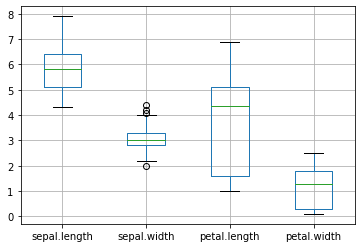

In [ ]:
iris_df.boxplot()
plt.show()

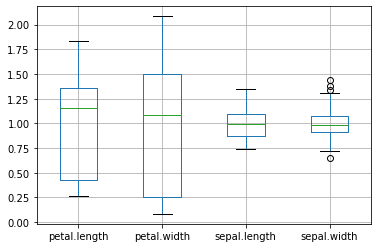

In [ ]:
#calculate normalaized dataframe
normalized_df = iris_df/iris_df.mean()
normalized_df.boxplot()

In [ ]:
# Print the variances of the normalized data
print(normalized_df.var())

petal.length    0.220659
petal.width     0.403925
sepal.length    0.020082
sepal.width     0.020325
variety              NaN
dtype: float64


In [ ]:
#lets try with treshold value 0.03
from sklearn.feature_selection import VarianceThreshold
#create variance threshold feature selector
selector = VarianceThreshold(threshold=0.03)
#fit the selector to normalized head_df
selector.fit(normalized_df)
#create boolean mask (List of boolean array)
mask = selector.get_support()
print(mask)
#apply the mask to create a reduced dataframe
reduced_df = iris_df.loc[:,mask]

print("Dimensionality reduced from {} to {}.".format(iris_df.shape[1],reduced_df.shape[1]))



[ True  True False False False]
Dimensionality reduced from 5 to 2.


/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_variance_threshold.py:77: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)


# **Removing features with many missing values**

In [ ]:
school_df = pd.read_csv('/content/Public_Schools2.csv')
school_df.head()

,x,y,objectid_1,objectid,bldg_id,bldg_name,address,city,zipcode,csp_sch_id,sch_id,sch_name,sch_label,sch_type,shared,complex,label,tlt,pl,point_x,point_y
0,-71.004121,42.388799,1,1,1,Guild Bldg,195 Leyden Street,East Boston,2128,4061,4061,Guild Elementary,Guild,ES,NaN,NaN,52,3,Grace,790128.152748,2.967094e+06
1,-71.030480,42.378545,2,2,3,"Kennedy, P Bldg",343 Saratoga Street,East Boston,2128,4541,4541,Kennedy Patrick Elem,PJ Kennedy,ES,NaN,NaN,72,3,Grace,783027.745829,2.963318e+06
2,-71.033891,42.375279,3,3,4,Otis Bldg,218 Marion Street,East Boston,2128,4322,4322,Otis Elementary,Otis,ES,NaN,NaN,106,3,Grace,782112.823908,2.962122e+06
3,-71.038011,42.378089,4,4,6,Odonnell Bldg,33 Trenton Street,East Boston,2128,4543,4543,O'Donnell Elementary,O'Donnell,ES,NaN,NaN,103,3,Grace,780994.000003,2.963140e+06
4,-71.034921,42.380957,5,5,7,East Boston High Bldg,86 White Street,East Boston,2128,1070,1070,East Boston High,East Boston HS,HS,NaN,NaN,36,2,Joel,781823.000004,2.964190e+06


In [ ]:
#In what range lies highest ratio of missing values for a single feature in the dataset?
school_df.isna().sum()

x               0
y               0
objectid_1      0
objectid        0
bldg_id         0
bldg_name       0
address         0
city            0
zipcode         0
csp_sch_id      0
sch_id          0
sch_name        0
sch_label       0
sch_type        0
shared        115
complex       129
label           0
tlt             0
pl              0
point_x         0
point_y         0
dtype: int64

In [ ]:
#divide the result by the length of the dataframe to obtain ratio
school_df.isna().sum()/len(school_df)

x             0.000000
y             0.000000
objectid_1    0.000000
objectid      0.000000
bldg_id       0.000000
bldg_name     0.000000
address       0.000000
city          0.000000
zipcode       0.000000
csp_sch_id    0.000000
sch_id        0.000000
sch_name      0.000000
sch_label     0.000000
sch_type      0.000000
shared        0.877863
complex       0.984733
label         0.000000
tlt           0.000000
pl            0.000000
point_x       0.000000
point_y       0.000000
dtype: float64

In [ ]:
#Calculate the missing value ratio per feature and then create a mask to remove features with many missing values.
# Create a boolean mask on whether each feature less than 50% missing values.
mask = school_df.isna().sum()/len(school_df)<0.5

# Create a reduced dataset by applying the mask
reduced_df = school_df.loc[:,mask]

print(school_df.shape)
print(reduced_df.shape)


(131, 21)
(131, 19)


# **PAIRWISE CORELATION**
This is another method where we need to look at how features relate to one another to decide if they are worth keeping. To quantify the correlation between features,we need to have a measure for the strength of the correlation, this is where the correlation coefficient r comes in. The value of r always lies between minus one and plus one.

-1 : Perfect Negative corelation

+1 : Perfect Positive Corelation

0 : No Corealtion

If we call the pandas *.corr()* on the dataset the pairplot was built on, we'd get a so-called **correlation matrix**. It shows the correlation coefficient for each pairwise combination of features in the dataset. 



In [ ]:
#CHECK CORELATION FOR DATASET
corr = iris_df.corr()
cmap = sns.diverging_palette(h_neg=10,
h_pos=40,
as_cmap=True)

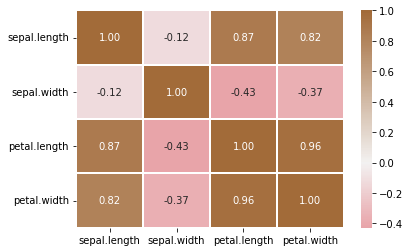

In [ ]:
import seaborn as sns
import numpy as np
sns.heatmap(corr, cmap=cmap, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

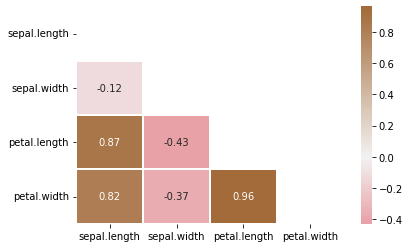

In [ ]:
# Generate a mask for the upper triangle 
mask = np.triu(np.ones_like(corr, dtype=bool))
#add the mask to the heatmap
sns.heatmap(corr,mask=mask, cmap=cmap,center=0,linewidths=1,annot=True,fmt=".2f")
plt.show()

#petal width and height have the strongest co-relation -->

# **Removing highly correlated features**


*   Highly co-related features (1 or -1) bring no new information to a dataset but do add to the complexity. So naturally, we would want to drop one of the two features that hold the same information.
*   We might want to drop features that have correlation coefficients close to one or minus one if they are measurements of the same or similar things. 
*   First create a **correlation matrix** and take the absolute values of that, to also filter out strong negative correlations. 
*   Create a **mask** for the upper triangle of the dataset, pass this mask to the Pandas dataframe .mask() method it will replace all positions in the dataframe where the mask has a True value with NA. (The reason we use mask is that we want to avoid removing both features when they have a strong co-relation)

Removing co-related features produces weird results when relation between 2 related features are non-linear or when outliers are involved.



In [ ]:
sales_df = pd.read_csv('/content/Public_Schools2.csv')
print(sales_df.shape)

(131, 21)


In [ ]:
import math
import numpy as np

In [ ]:
sales_df.head(5)

,x,y,objectid_1,objectid,bldg_id,bldg_name,address,city,zipcode,csp_sch_id,sch_id,sch_name,sch_label,sch_type,shared,complex,label,tlt,pl,point_x,point_y
0,-71.004121,42.388799,1,1,1,Guild Bldg,195 Leyden Street,East Boston,2128,4061,4061,Guild Elementary,Guild,ES,NaN,NaN,52,3,Grace,790128.152748,2.967094e+06
1,-71.030480,42.378545,2,2,3,"Kennedy, P Bldg",343 Saratoga Street,East Boston,2128,4541,4541,Kennedy Patrick Elem,PJ Kennedy,ES,NaN,NaN,72,3,Grace,783027.745829,2.963318e+06
2,-71.033891,42.375279,3,3,4,Otis Bldg,218 Marion Street,East Boston,2128,4322,4322,Otis Elementary,Otis,ES,NaN,NaN,106,3,Grace,782112.823908,2.962122e+06
3,-71.038011,42.378089,4,4,6,Odonnell Bldg,33 Trenton Street,East Boston,2128,4543,4543,O'Donnell Elementary,O'Donnell,ES,NaN,NaN,103,3,Grace,780994.000003,2.963140e+06
4,-71.034921,42.380957,5,5,7,East Boston High Bldg,86 White Street,East Boston,2128,1070,1070,East Boston High,East Boston HS,HS,NaN,NaN,36,2,Joel,781823.000004,2.964190e+06


In [ ]:
#create a positive corelation matrix
corr_matrix = sales_df.corr().abs()
corr_matrix

,x,y,objectid_1,objectid,bldg_id,zipcode,csp_sch_id,sch_id,label,tlt,point_x,point_y
x,1.000000,0.473364,0.510227,0.007908,0.278011,0.281229,0.082078,0.082078,0.031629,0.205847,0.999985,0.476233
y,0.473364,1.000000,0.329981,0.126231,0.235797,0.029144,0.045393,0.045393,0.085786,0.156413,0.468584,0.999993
objectid_1,0.510227,0.329981,1.000000,0.415062,0.447980,0.191296,0.078681,0.078681,0.245372,0.152767,0.509573,0.331199
objectid,0.007908,0.126231,0.415062,1.000000,0.141916,0.059306,0.145790,0.145790,0.254616,0.102482,0.008674,0.125981
bldg_id,0.278011,0.235797,0.447980,0.141916,1.000000,0.082355,0.049492,0.049492,0.000062,0.045506,0.277419,0.236490
zipcode,0.281229,0.029144,0.191296,0.059306,0.082355,1.000000,0.097984,0.097984,0.065360,0.100271,0.281904,0.029995
csp_sch_id,0.082078,0.045393,0.078681,0.145790,0.049492,0.097984,1.000000,1.000000,0.160027,0.599612,0.082465,0.045252
sch_id,0.082078,0.045393,0.078681,0.145790,0.049492,0.097984,1.000000,1.000000,0.160027,0.599612,0.082465,0.045252
label,0.031629,0.085786,0.245372,0.254616,0.000062,0.065360,0.160027,0.160027,1.000000,0.139426,0.031164,0.085621
tlt,0.205847,0.156413,0.152767,0.102482,0.045506,0.100271,0.599612,0.599612,0.139426,1.000000,0.207291,0.155647


In [ ]:
#create True/False mask and apply it to the corelation matrix
mask = np.triu(np.ones_like(corr_matrix,dtype=bool))
tri_df=corr_matrix.mask(mask)
tri_df

,x,y,objectid_1,objectid,bldg_id,zipcode,csp_sch_id,sch_id,label,tlt,point_x,point_y
x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
y,0.473364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
objectid_1,0.510227,0.329981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
objectid,0.007908,0.126231,0.415062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bldg_id,0.278011,0.235797,0.447980,0.141916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zipcode,0.281229,0.029144,0.191296,0.059306,0.082355,NaN,NaN,NaN,NaN,NaN,NaN,NaN
csp_sch_id,0.082078,0.045393,0.078681,0.145790,0.049492,0.097984,NaN,NaN,NaN,NaN,NaN,NaN
sch_id,0.082078,0.045393,0.078681,0.145790,0.049492,0.097984,1.000000,NaN,NaN,NaN,NaN,NaN
label,0.031629,0.085786,0.245372,0.254616,0.000062,0.065360,0.160027,0.160027,NaN,NaN,NaN,NaN
tlt,0.205847,0.156413,0.152767,0.102482,0.045506,0.100271,0.599612,0.599612,0.139426,NaN,NaN,NaN


In [ ]:
# List column names of highly correlated features (r > 0.95)
to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.95)]
# Drop the features in the to_drop list
reduced_df = sales_df.drop(to_drop, axis=1)
reduced_df.head(10)

,objectid_1,objectid,bldg_id,bldg_name,address,city,zipcode,sch_id,sch_name,sch_label,sch_type,shared,complex,label,tlt,pl,point_x,point_y
0,1,1,1,Guild Bldg,195 Leyden Street,East Boston,2128,4061,Guild Elementary,Guild,ES,NaN,NaN,52,3,Grace,790128.152748,2.967094e+06
1,2,2,3,"Kennedy, P Bldg",343 Saratoga Street,East Boston,2128,4541,Kennedy Patrick Elem,PJ Kennedy,ES,NaN,NaN,72,3,Grace,783027.745829,2.963318e+06
2,3,3,4,Otis Bldg,218 Marion Street,East Boston,2128,4322,Otis Elementary,Otis,ES,NaN,NaN,106,3,Grace,782112.823908,2.962122e+06
3,4,4,6,Odonnell Bldg,33 Trenton Street,East Boston,2128,4543,O'Donnell Elementary,O'Donnell,ES,NaN,NaN,103,3,Grace,780994.000003,2.963140e+06
4,5,5,7,East Boston High Bldg,86 White Street,East Boston,2128,1070,East Boston High,East Boston HS,HS,NaN,NaN,36,2,Joel,781823.000004,2.964190e+06
5,6,6,8,Umana / Barnes Bldg,312 Border Street,East Boston,2128,4323,Umana Academy,Umana Academy,K-8,NaN,NaN,124,3,Grace,780367.000002,2.963210e+06
6,7,7,10,East Boston Eec Bldg,135 Gove Street,East Boston,2128,4450,East Boston EEC,East Boston EEC,ELC,NaN,NaN,35,1,Marice,782062.000004,2.960080e+06
7,8,8,11,Mckay Bldg,122 Cottage Street,East Boston,2128,4360,McKay K-8,McKay K-8,K-8,NaN,NaN,89,3,Grace,782012.096740,2.959933e+06
8,9,9,12,Adams Bldg,165 Webster Street,East Boston,2128,4361,Adams Elementary,Adams,ES,NaN,NaN,1,3,Grace,781862.000004,2.958580e+06
9,10,10,13,Harvard-Kent,50 Bunker Hill Street,Charlestown,2129,4280,Harvard/Kent Elem,Harvard/Kent,ES,NaN,NaN,55,3,Grace,775732.999998,2.962580e+06


In [ ]:
print("The reduced dataframe has {} columns.".format(reduced_df.shape[1]))

The reduced dataframe has 18 columns.


# **Selecting features for model performance**

1.   Perform a train-test split and transform the data( *Standardize the trainingg feature dataset to have variance  and mean 0* )
2.   Fit a logistic regression model on the standardized training data
3.   To see how the model performs on the test set we first scale these features with the .transform() method of the scaler that we just fit on the training set and then make our prediction
4.   



In [ ]:
#Building a diabetes classifier  predict whether a person has diabetes using logistic regression. 
#Read dataset
diabetes_df = pd.read_csv('/content/Diabetes.csv')

# Select the test column as the feature to be predicted (y)
y = diabetes_df['test']
# Remove the test column to create the training data
X = diabetes_df.drop('test',1)
#perform 70% train and 30% test data split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
print("{} rows in test set vs. {} in training set. {} Features.".format(X_test.shape[0], X_train.shape[0], X_test.shape[1]))


118 rows in test set vs. 274 in training set. 8 Features.


In [ ]:
#Define a scalar
scaler = StandardScaler()
lr = LogisticRegression()


In [ ]:
# Fit the scaler on the training features and transform these in one go
X_train_std = scaler.fit_transform(X_train)

# Fit the logistic regression model on the scaled training data
lr.fit(X_train_std, y_train)

# Scale the test features
X_test_std = scaler.transform(X_test,y_test)

# Predict diabetes presence on the scaled test set
y_pred = lr.predict(X_test_std)

# Prints accuracy metrics and feature coefficients
print("{0:.1%} accuracy on test set.".format(accuracy_score(y_test, y_pred))) 
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

ValueError: ignored

MANUAL RECURSIVE FEATURE ELIMINATION

    First, run the given code, then remove the feature with the lowest model coefficient from X.

    Run the code and remove 2 more features with the lowest model coefficients.

    Run the code and only keep the feature with the highest coefficient.



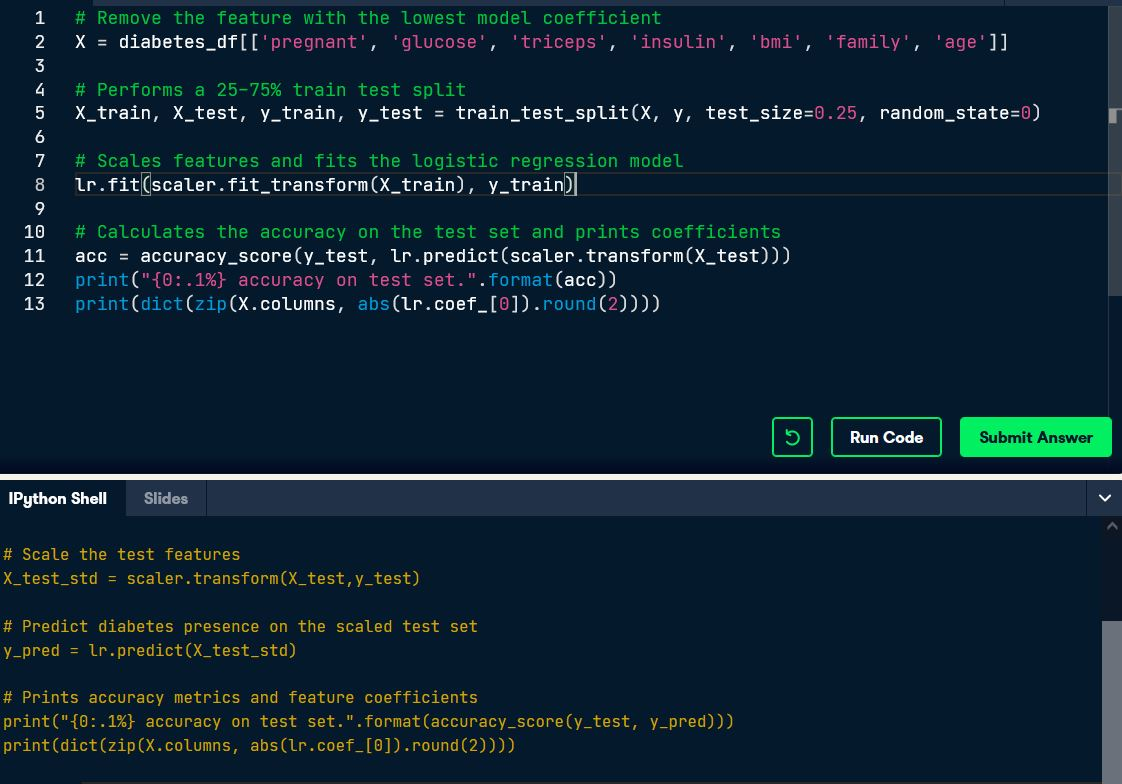

**Automatic Recursive Feature Elimination**


In [ ]:
# Fits the eliminator to the data
rfe.fit(X_train, y_train)

# Print the features and their ranking (high = dropped early on)
print(dict(zip(X.columns, rfe.ranking_)))

# Print the features that are not eliminated
print(X.columns[rfe.support_])

# Calculates the test set accuracy
acc = accuracy_score(y_test, rfe.predict(X_test))
print("{0:.1%} accuracy on test set.".format(acc)) 

# **Tree-based feature selection**

*    random forest classifier is an ensemble model that will pass different, random, subsets of features to a number of decision trees. To make a prediction it will aggregate over the predictions of the individual trees. 
*   By averaging how often features are used to make decisions inside the different decision trees, and taking into account whether these are important decisions near the root of the tree or less important decisions in the smaller branches of the tree, the random forest algorithm manages to calculate feature importance values. 
*   **Feature importance values** : Used create a True/False mask for features that meet a certain importance threshold. Then, we  apply that mask to our feature dataframe to implement the actual feature selection. 
*   not drop all least important features at once to avoid risk




In [ ]:
######BUILDING A RANDOM FOREST MODEL#####

diabetes_df = pd.read_csv('/content/Diabetes.csv')
# Select the test column as the feature to be predicted (y)
y = diabetes_df['test']
# Remove the test column to create the training data
X = diabetes_df.drop('test',1)

In [ ]:
# Perform a 75% training and 25% test data split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
# Fit the random forest model to the training data
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train,y_train)


RandomForestClassifier(random_state=0)

In [ ]:
# Calculate the accuracy
acc = accuracy_score(y_test, rf.predict(X_test))

# Print the importances per feature
print(dict(zip(X.columns, rf.feature_importances_.round(2))))

# Print accuracy
print("{0:.1%} accuracy on test set.".format(acc))

{'pregnant': 0.07, 'glucose': 0.25, 'diastolic': 0.09, 'triceps': 0.09, 'insulin': 0.14, 'bmi': 0.12, 'family': 0.12, 'age': 0.13}
79.6% accuracy on test set.


In [ ]:
####Random forest for feature selection
# Create a mask for features importances above the threshold
mask = rf.feature_importances_>0.15

# Prints out the mask
print(mask)

[False  True False False False False False False]


In [ ]:
# Apply the mask to the feature dataset X
reduced_X = X.loc[:,mask]

# prints out the selected column names
print(reduced_X.columns)

Index(['glucose'], dtype='object')


***RECURSIVE FEATURE ELIMINATION WITH RANDOM FOREST***


You'll wrap a Recursive Feature Eliminator around a random forest model to remove features step by step. This method is more conservative compared to selecting features after applying a single importance threshold. Since dropping one feature can influence the relative importances of the others.


In [ ]:
# Set the feature eliminator to remove 2 features on each step
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=2, step=2, verbose=1)

# Fit the model to the training data
rfe.fit(X_train, y_train)

# Create a mask
mask = rfe.support_

# Apply the mask to the feature dataset X and print the result
reduced_X = X.loc[:, mask]
print(reduced_X.columns)

Fitting estimator with 8 features.
Fitting estimator with 6 features.
Fitting estimator with 4 features.
Index(['glucose', 'insulin'], dtype='object')


# **Regularized linear regression**

*So far, we focused on how to reduce dimensionality using classification algorithms. Let's see what we can do with regressions.*

HOW LINEAR REGRESSION WORK?

We'll build a model that derives the linear function between three input values and a target. We create three features x1, x2, and x3 that all follow a simple normal distribution. We can then create our own target y with a function of our choice.

Let's say :
 y = 20 + 5x1 + 2x2 + error

Now that we've set the ground truth for this dataset, let's see if a model can derive it. 

## **Creating a LASSO regressor**
We will predict a persons Body Mass Index (BMI) using  Lasso() regressor.

In [ ]:
ANSUR_M = pd.read_csv('/content/drive/MyDrive/Datasets/ANSUR_II_MALE.csv')
ANSUR_M.head()

,Branch,Component,Gender,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,...,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI,BMI_class,Height_class
0,Combat Arms,Regular Army,Male,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,...,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,175,853,81.5,1.776,25.838761,Overweight,Tall
1,Combat Support,Regular Army,Male,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,...,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,167,815,72.6,1.702,25.062103,Overweight,Normal
2,Combat Support,Regular Army,Male,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,...,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,180,831,92.9,1.735,30.861480,Overweight,Normal
3,Combat Service Support,Regular Army,Male,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,...,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,176,793,79.4,1.655,28.988417,Overweight,Normal
4,Combat Service Support,Regular Army,Male,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,...,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,188,954,94.6,1.914,25.823034,Overweight,Tall


In [ ]:
#To filter out non numeric columns with strings
ANSUR_M_numeric = ANSUR_M._get_numeric_data()

In [ ]:
ANSUR_M_numeric.dtypes

abdominalextensiondepthsitting      int64
acromialheight                      int64
acromionradialelength               int64
anklecircumference                  int64
axillaheight                        int64
                                   ...   
wristcircumference                  int64
wristheight                         int64
weight_kg                         float64
stature_m                         float64
BMI                               float64
Length: 94, dtype: object

In [ ]:
y = ANSUR_M_numeric['BMI']
X = ANSUR_M_numeric.drop('BMI',1)

In [ ]:
# Set the test size to 30% to get a 70-30% train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fit the scaler on the training features and transform these in one go
X_train_std = StandardScaler().fit_transform(X_train)

# Create the Lasso model 
la = Lasso()

# Fit it to the standardized training data
la.fit(X_train_std, y_train)

Lasso()

Now that you've trained the Lasso model, you'll score its predictive capacity R^2 on the test set and count how many features are ignored because their coefficient is reduced to zero.

In [ ]:
# Transform the test set with the pre-fitted scaler
X_test_std = StandardScaler().fit_transform(X_test)

# Calculate the coefficient of determination (R squared) on X_test_std
r_squared = la.score(X_test_std, y_test)
print("The model can predict {0:.1%} of the variance in the test set.".format(r_squared))

# Create a list that has True values when coefficients equal 0
zero_coef = la.coef_ == 0

# Calculate how many features have a zero coefficient
n_ignored = sum(zero_coef)
print("The model has ignored {} out of {} features.".format(n_ignored, len(la.coef_)))

The model can predict 84.3% of the variance in the test set.
The model has ignored 84 out of 93 features.


**Adjusting the regularization strength**

Your current Lasso model has an R^2 score of 84.3%. When a model applies overly powerful regularization it can suffer from high bias, hurting its predictive power. Let's improve the balance between predictive power and model simplicity by tweaking the alpha parameter.

In [ ]:
#Find the highest value for alpha that gives an value above 84.3% from the options: 1, 0.5, 0.1, and 0.01
# Find the highest alpha value with R-squared above 84.3%
la = Lasso(alpha=0.5, random_state=0)

# Fits the model and calculates performance stats
la.fit(X_train_std, y_train)
r_squared = la.score(X_test_std, y_test)
n_ignored_features = sum(la.coef_ == 0)

# Print peformance stats 
print("The model can predict {0:.1%} of the variance in the test set.".format(r_squared))
print("{} out of {} features were ignored.".format(n_ignored_features, len(la.coef_)))

The model can predict 93.5% of the variance in the test set.
81 out of 93 features were ignored.


# **Combining feature selectors**
manually finding a good alpha value can be tedious.The LassoCV() class will use cross validation to try out different alpha settings and select the best one. When we fit this model to our training data it will get an alpha_ attribute with the optimal value. To actually remove the features to which the Lasso regressor assigned a zero coefficient, we once again create a mask with True values for all non-zero coefficients. We can then apply it to our feature dataset X with the loc method. 

In [ ]:
# Create and fit the LassoCV model on the training set
lcv = LassoCV()
lcv.fit(X_train, y_train)
print('Optimal alpha = {0:.3f}'.format(lcv.alpha_))

# Calculate R squared on the test set
r_squared = lcv.score(X_test, y_test)
print('The model explains {0:.1%} of the test set variance'.format(r_squared))

# Create a mask for coefficients not equal to zero
lcv_mask = lcv.coef_!= 0
print('{} features out of {} selected'.format(sum(lcv_mask), len(lcv_mask)))

Optimal alpha = 0.404
The model explains 99.1% of the test set variance
38 features out of 93 selected


**Ensemble models for extra votes**

Let's use two more models to select the 10 features they consider most important using the Recursive Feature Eliminator (RFE).

In [ ]:
# Select 10 features with RFE on a GradientBoostingRegressor, drop 3 features on each step
rfe_gb = RFE(estimator= GradientBoostingRegressor(),n_features_to_select=10,step=3,verbose=1)

In [ ]:
#Calculate R square on test set
r_squared = rfe_gb.fit(X_test, y_test)
#or use .score instead of .fit

Fitting estimator with 93 features.
Fitting estimator with 90 features.
Fitting estimator with 87 features.
Fitting estimator with 84 features.
Fitting estimator with 81 features.
Fitting estimator with 78 features.
Fitting estimator with 75 features.
Fitting estimator with 72 features.
Fitting estimator with 69 features.
Fitting estimator with 66 features.
Fitting estimator with 63 features.
Fitting estimator with 60 features.
Fitting estimator with 57 features.
Fitting estimator with 54 features.
Fitting estimator with 51 features.
Fitting estimator with 48 features.
Fitting estimator with 45 features.
Fitting estimator with 42 features.
Fitting estimator with 39 features.
Fitting estimator with 36 features.
Fitting estimator with 33 features.
Fitting estimator with 30 features.
Fitting estimator with 27 features.
Fitting estimator with 24 features.
Fitting estimator with 21 features.
Fitting estimator with 18 features.
Fitting estimator with 15 features.
Fitting estimator with 12 fe

In [ ]:
#Assign the support array of the fitted model to gb_mask. support_ attribute provides a True or False for each input variable.
gb_mask = rfe_gb.support_

In [ ]:
#Modify the first step to select 10 features with RFE on a RandomForestRegressor() and drop 3 features on each step.
rfe_gb = RFE(estimator= RandomForestRegressor(),n_features_to_select=10,step=3,verbose=1)
#Calculate R square on test set
r_squared = rfe_gb.fit(X_test, y_test)

Fitting estimator with 93 features.
Fitting estimator with 90 features.
Fitting estimator with 87 features.
Fitting estimator with 84 features.
Fitting estimator with 81 features.
Fitting estimator with 78 features.
Fitting estimator with 75 features.
Fitting estimator with 72 features.
Fitting estimator with 69 features.
Fitting estimator with 66 features.
Fitting estimator with 63 features.
Fitting estimator with 60 features.
Fitting estimator with 57 features.
Fitting estimator with 54 features.
Fitting estimator with 51 features.
Fitting estimator with 48 features.
Fitting estimator with 45 features.
Fitting estimator with 42 features.
Fitting estimator with 39 features.
Fitting estimator with 36 features.
Fitting estimator with 33 features.
Fitting estimator with 30 features.
Fitting estimator with 27 features.
Fitting estimator with 24 features.
Fitting estimator with 21 features.
Fitting estimator with 18 features.
Fitting estimator with 15 features.
Fitting estimator with 12 fe

In [ ]:
#Assign the support array of the fitted model to gb_mask. support_ attribute provides a True or False for each input variable.
rf_mask = rfe_gb.support_

**Combining 3 feature selectors**

We'll combine the votes of the 3 models you built in the previous exercises, to decide which features are important into a meta mask. We'll then use this mask to reduce dimensionality and see how a simple linear regressor performs on the reduced dataset.

In [ ]:
# Sum the votes of the three models
votes = np.sum([lcv_mask,rf_mask,gb_mask],axis=0)
print(votes)

[3 0 0 0 3 0 0 0 3 0 0 0 0 0 0 1 3 1 0 0 1 1 0 3 1 0 0 1 1 0 0 0 1 0 0 0 0
 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 3 0 1 0 0 1 1 0 1
 1 0 3 1 1 1 0 0 1 0 0 3 1 0 1 0 0 3 2]


In [ ]:
# Create a mask for features selected by all 3 models
meta_mask = votes >= 3
print(meta_mask)

[ True False False False  True False False False  True False False False
 False False False False  True False False False False False False  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False False False False False
 False False False False  True False False False False False False False
 False  True False False False False False  True False]


In [ ]:
# Apply the dimensionality reduction on X
X_reduced = X.loc[:,meta_mask]
print(X_reduced.columns)

Index(['abdominalextensiondepthsitting', 'axillaheight',
       'bicepscircumferenceflexed', 'buttockdepth', 'chestcircumference',
       'poplitealheight', 'thighcircumference', 'waistcircumference',
       'weight_kg'],
      dtype='object')


In [ ]:
lm = linear_model.LinearRegression()

In [ ]:
# Plug the reduced dataset into a linear regression pipeline
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=0)
lm.fit(StandardScaler().fit_transform(X_train), y_train)
r_squared = lm.score(StandardScaler().fit_transform(X_test), y_test)
print('The model can explain {0:.1%} of the variance in the test set using {1:} features.'.format(r_squared, len(lm.coef_)))

The model can explain 97.9% of the variance in the test set using 9 features.


# **FEATURE EXTRACTION**

Feature extraction is different in the sense that it creates new features, which are in fact combinations of the original ones. There are powerful algorithms that will calculate the new features in a way that as much information as possible is preserved.

*Example 1 :*
Feature generation - BMI : Take for instance the body mass index or BMI we've worked with before. Its a measure on whether a person is under- or overweight regardless of their height; and can be calculated by dividing a person's weight by the square of the height. If we build a diabetes model on this data the height and weight features by themselves might be useless once we have the BMI.

*Example 2 ( Intro to PCA)*

Imagine that our body measurement dataset would have measurements of both left and right leg lengths. For most applications it would be sufficient to reduce these two features into a single leg length feature. We could create such a feature with the dataframe's .mean() method with the axis argument equal to one & drop the original features.

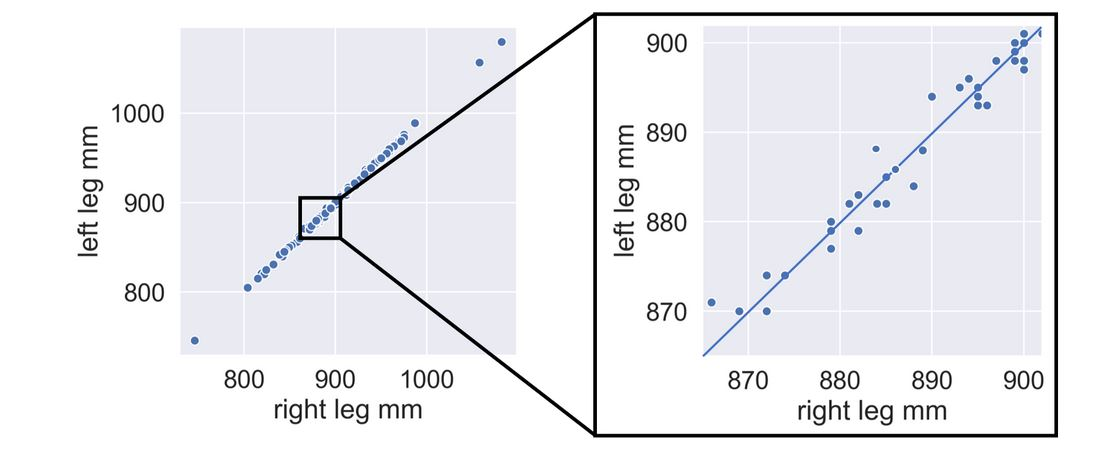

The cost of this is we can lose minute details and information about difference in leg length among subjects. When we add a line for where the two features are equal it becomes easy to identify people with different leg lengths. 

Let us take a data sample with hand lengths versus feet lengths. Instead of taking the mean of both features. For this technique it's important to scale the features first, so that their values are easier to compare. **What we could do is add a reference point to the very center of the point cloud, and then point a vector (indicated by red arrow) in the direction of this strongest pattern. People with a positive value for this vector have relatively long hands and feet, and people with a negative value have relatively short ones.** 
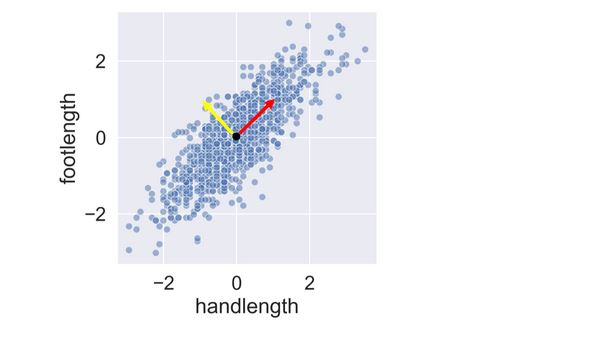

**We could add a second vector perpendicular to the first one to account for the rest of the variance in this dataset. People with a positive value for this second vector have relatively long feet compared to their hand length and people with a negative value have relatively big hands.**

Every point in this dataset could be described by multiplying and then summing these two perpendicular vectors. We've essentially created a new reference system aligned with the variance in the data. The coordinates that each point has in this new reference system are called principal components.



In [ ]:
#Manual feature extraction I
sales = pd.read_csv('/content/grocery_sales.csv')
sales.head(5)

,storeID,product,quantity,revenue
0,A,Apples,1811,9300.6
1,A,Bananas,1003,3375.2
2,A,Oranges,1604,8528.5
3,B,Apples,1785,9181.0
4,B,Bananas,944,3680.2


In [ ]:
sales['price']= sales['revenue']/sales['quantity']
reduced_sales = sales.drop(['quantity','revenue'], axis=1)
print(reduced_sales.head())

  storeID  product     price
0       A   Apples  5.135616
1       A  Bananas  3.365105
2       A  Oranges  5.317020
3       B   Apples  5.143417
4       B  Bananas  3.898517


**HOW DOES PCA WORK?**

We already saw that you can describe the information captured by two features by using two perpendicular vectors that are aligned with the variance in the data. For instance the point highlighted here has coordinates 2.7 and 1 in the original hand length versus foot length reference system. But we could just as well describe this point using multiplications of the vectors. In this case it would be 2 times the red vector and minus 1 times the yellow vector. 
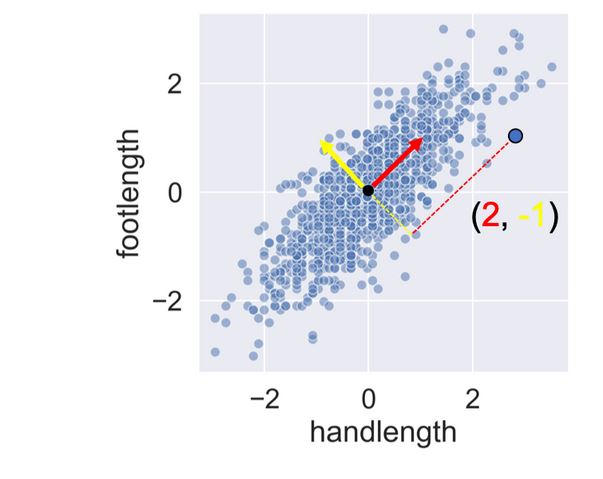

*  We can calculate these principal components for all points in the dataset  with sklearn's PCA() class after scaling the values with the StandardScaler(). PCA can really underperform if you don't do this. 

*  We can then create our PCA instance and apply the .fit_transform() method to the scaled data to calculate the two principal components. 

If we would add a third feature to the original dataset we would also have to add a third principal component if we don't want to lose any information. But it doesn't mean we have to keep too many components for a multi dimensional dataset. the components share no duplicate information and that they are ranked from most to least important. We can access the explained variance ratio of each principal component after fitting the algorithm to the data using the .explained_variance_ratio_ attribute. In this case it tells us that the first components explains 90% of the variance in the data and the second the remaining 10%. *When you are dealing with a dataset with a lot of correlation the explained variance typically becomes concentrated in the first few components. The remaining components then explain so little variance that they can be dropped.*

In [ ]:
#CALCULATING PRINCIPAL COMPONENTS

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
ansur_df = pd.read_csv('/content/drive/MyDrive/Datasets/ANSUR_II_MALE.csv')
print(ansur_df.columns.values)

['Branch' 'Component' 'Gender' 'abdominalextensiondepthsitting'
 'acromialheight' 'acromionradialelength' 'anklecircumference'
 'axillaheight' 'balloffootcircumference' 'balloffootlength'
 'biacromialbreadth' 'bicepscircumferenceflexed' 'bicristalbreadth'
 'bideltoidbreadth' 'bimalleolarbreadth' 'bitragionchinarc'
 'bitragionsubmandibulararc' 'bizygomaticbreadth' 'buttockcircumference'
 'buttockdepth' 'buttockheight' 'buttockkneelength'
 'buttockpopliteallength' 'calfcircumference' 'cervicaleheight'
 'chestbreadth' 'chestcircumference' 'chestdepth' 'chestheight'
 'crotchheight' 'crotchlengthomphalion' 'crotchlengthposterioromphalion'
 'earbreadth' 'earlength' 'earprotrusion' 'elbowrestheight'
 'eyeheightsitting' 'footbreadthhorizontal' 'footlength'
 'forearmcenterofgriplength' 'forearmcircumferenceflexed'
 'forearmforearmbreadth' 'forearmhandlength' 'functionalleglength'
 'handbreadth' 'handcircumference' 'handlength' 'headbreadth'
 'headcircumference' 'headlength' 'heelanklecircumfere

In [ ]:
ansur_df_new = ansur_df [['axillaheight','buttockheight','waistcircumference','shouldercircumference']]
ansur_df_new.head()

,axillaheight,buttockheight,waistcircumference,shouldercircumference
0,1347,882,933,1151
1,1293,870,870,1119
2,1327,901,964,1276
3,1239,821,857,1155
4,1478,1080,868,1231


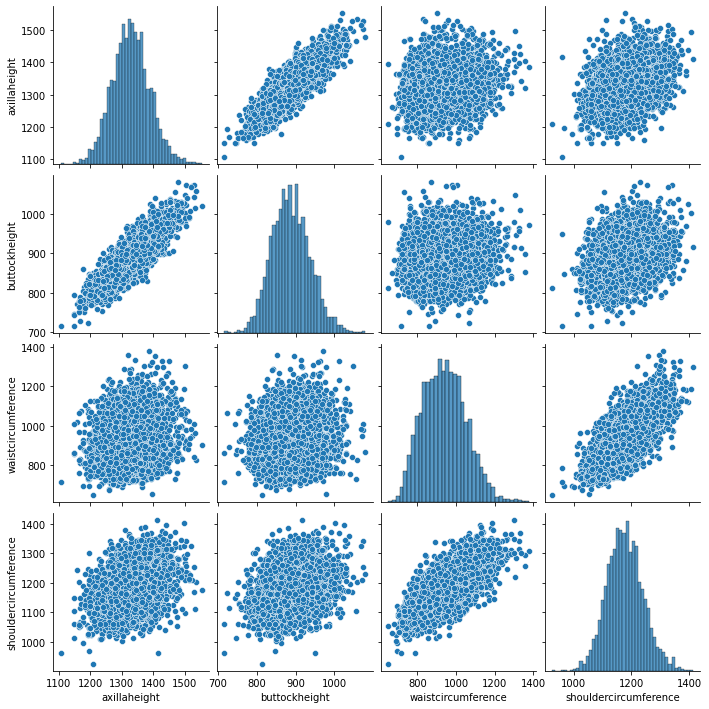

In [ ]:
sns.pairplot(ansur_df_new)

In [ ]:
# Create the scaler and standardize the data
scaler = StandardScaler()
ansur_std = scaler.fit_transform(ansur_df_new)
ansur_std

array([[ 0.30109702, -0.11753878, -0.06784192, -0.43391113],
       [-0.60633129, -0.35795632, -0.6318921 , -0.93722522],
       [-0.03498754,  0.26312234,  0.20970658,  1.53215956],
       ...,
       [-0.82478626, -0.61840867,  0.45144237,  0.03794584],
       [-0.2534425 ,  0.20301795, -1.41081853, -0.26089691],
       [ 1.32615493,  1.86590599,  1.24827515,  0.82437411]])

In [ ]:
# Create the PCA instance and fit and transform the data with pca
pca = PCA()
pc = pca.fit_transform(ansur_std)
# This changes the numpy array output back to a dataframe
pc_df = pd.DataFrame(pc, columns=['PC 1', 'PC 2', 'PC 3', 'PC 4'])
pc_df.head()

,PC 1,PC 2,PC 3,PC 4
0,0.141386,0.313674,0.308806,0.289160
1,1.251391,0.396210,0.166583,-0.150785
2,-0.973804,-0.728157,-0.974223,-0.185289
3,2.031791,-0.646954,-0.480564,-0.077859
4,-3.553352,2.914204,-0.569262,-0.859439


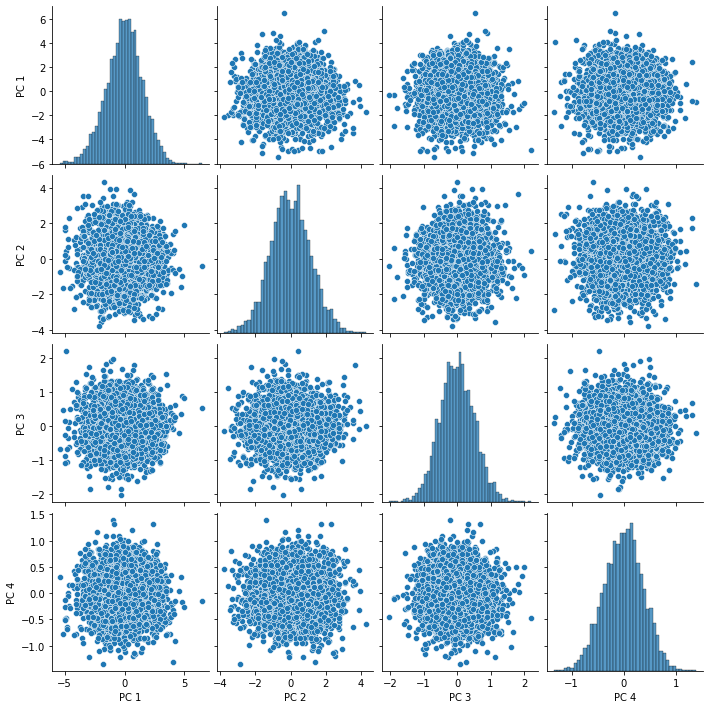

In [ ]:
# Create a pairplot of the principal component dataframe
sns.pairplot(pc_df)

In [ ]:
ansur_df = pd.read_csv('/content/drive/MyDrive/Datasets/ANSUR_II_MALE.csv')

In [ ]:
#PCA on a larger dataset
ansur_df_new = ansur_df[['stature_m','buttockheight','waistdepth','span','waistcircumference',
 'shouldercircumference','footlength' ,'handlength', 'functionalleglength',
 'chestheight' ,'chestcircumference', 'cervicaleheight' ,'sittingheight']]
#scale the data
scaler = StandardScaler()
ansur_std = scaler.fit_transform(ansur_df_new)
pca = PCA()
pc = pca.fit_transform(ansur_std)
#Now let's see how the components explain the variance. You'll be inspecting the variance explained by the different principal components of the pca
print(pca.explained_variance_ratio_)



[0.57832831 0.2230137  0.06404218 0.04252456 0.0278581  0.01761021
 0.01681037 0.01014147 0.00706488 0.00607973 0.00344643 0.00228095
 0.00079911]


In [ ]:
# Print the cumulative sum of the explained variance ratio
print(pca.explained_variance_ratio_.cumsum())

[0.57832831 0.801342   0.86538419 0.90790875 0.93576684 0.95337706
 0.97018743 0.9803289  0.98739378 0.99347351 0.99691994 0.99920089
 1.        ]


# **PCA APPLICATIONS**

To improve your understanding of the components it can help to look at the .components_ attribute. This tells us to what extent each component's vector is affected by a particular feature. The features that have the biggest positive or negative effects on a component can then be used to add a meaning to that component. Consider the example :

PC1 = 0.75 x Handlength + 0.75 x Footlength

PC2 = -0.75 x Handlength + 0.75 x Footlength

Here, the second component is negatively affected by hand length. So people who score high for the second component have short hands compared to their feet. 





In [ ]:
df = pd.read_csv('/content/pokemon.csv')
#Remove categorical features(strings)
dfnew = df.select_dtypes(include=np.number)
#Build a pipeline
pipe = Pipeline([('scalar',StandardScaler()),('reducer', PCA(2))])
#Fit dataset to & extract component vectors
pipe.fit_transform(dfnew)
vectors = pipe.steps[1][1].components_.round(2)
# Print feature effects
print('PC 1 effects = ' + str(dict(zip(dfnew.columns, vectors[0]))))
print('PC 2 effects = ' + str(dict(zip(dfnew.columns, vectors[1]))))



PC 1 effects = {'#': 0.11, 'Total': 0.51, 'HP': 0.33, 'Attack': 0.38, 'Defense': 0.31, 'Sp. Atk': 0.39, 'Sp. Def': 0.38, 'Speed': 0.28, 'Generation': 0.07}
PC 2 effects = {'#': 0.69, 'Total': -0.07, 'HP': -0.01, 'Attack': -0.03, 'Defense': -0.01, 'Sp. Atk': -0.06, 'Sp. Def': -0.05, 'Speed': -0.11, 'Generation': 0.7}


In [ ]:
df_cat = df[['Type 1', 'Legendary']]
#use the PCA pipeline you've built in the previous exercise to visually explore how some categorical features relate to the variance in dfnew.
pipe = Pipeline([('scaler', StandardScaler()),('reducer', PCA(n_components=2))])
# Fit the pipeline to poke_df and transform the data
pc = pipe.fit_transform(dfnew)
# Add the 2 components to poke_cat_df
df_cat['PC 1'] = pc[:, 0]
df_cat['PC 2'] = pc[:, 1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


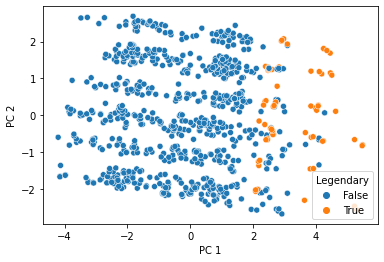

In [ ]:
sns.scatterplot(data=df_cat,x='PC 1', y='PC 2',hue='Legendary')
plt.show()

Let's see if we can add a classifier to our pipeline that detects legendary versus non-legendary Pokemon based on the principal components.

In [ ]:
# Build the pipeline
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components=3)),
        ('classifier', RandomForestClassifier(random_state=0))])

In [ ]:
df_poke = df.drop(columns=['#','Name','Type 1','Type 2'])

In [ ]:
# Select the test column as the feature to be predicted (y)
y = df_poke['Legendary']
# Remove the test column to create the training data
X = df_poke.drop('Legendary',1)
#perform 70% train and 30% test data split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
print("{} rows in test set vs. {} in training set. {} Features.".format(X_test.shape[0], X_train.shape[0], X_test.shape[1]))

240 rows in test set vs. 560 in training set. 8 Features.


In [ ]:
# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('reducer', PCA(n_components=3)),
                ('classifier', RandomForestClassifier(random_state=0))])

In [ ]:
# Score the accuracy on the test set
accuracy = pipe.score(X_test, y_test)
# Prints the explained variance ratio and accuracy
print(pipe.steps[1][1].explained_variance_ratio_)
print('{0:.1%} test set accuracy'.format(accuracy))

[0.46685709 0.1373921  0.12656084]
97.1% test set accuracy


# **PRINCIPAL COMPONENT SELECTION**

Until now, we set the number of components that the PCA algorithm should calculate. It is also possible to tell PCA the minimal proportion of variance we want to keep and let the algorithm decide on the number of components it needs to achieve that. 

We can do this by passing a number between 0 and 1 to the n_components parameter of PCA. When we pass it 0.9 it will make sure to select enough components to explain 90% of the variance. But how many components to keep? There is a trick that can help find a good balance. 

When you plot the explained variance ratio of a fitted PCA instance, you'll get to see that most of the explained variance is concentrated in the first few components. As you go from left to right in this type of plot you'll often see that the explained variance ratio per component starts to level out quite abruptly. The location where this shift happens is known as the 'elbow' in the plot. And it typically gives you a good starting point for the number of components to keep. Do note that the *x-axis shows you the index of the components and not the total number.* So since the elbow is at the component with index 1 here, we'd select 2 components. 
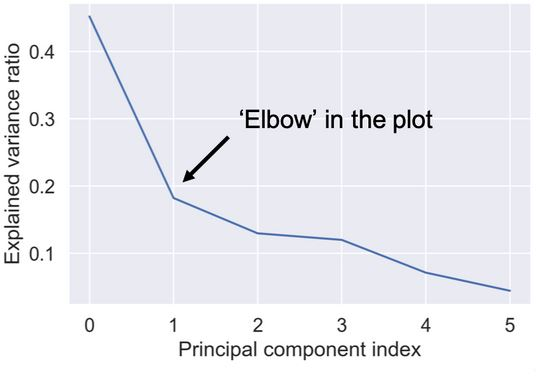

**Selecting the proportion of variance to keep**

You'll let PCA determine the number of components to calculate based on an explained variance threshold that you decide.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/ANSUR_II_MALE.csv')
ansur_df = df.select_dtypes(include=np.number)
#pipeline a scalar and pca selecting 10 components
pipe = Pipeline([('scalar',StandardScaler()),('reducer', PCA(n_components=10))])
#fit the pipe into ansur data
pipe.fit(ansur_df)

Pipeline(steps=[('scalar', StandardScaler()),
                ('reducer', PCA(n_components=10))])

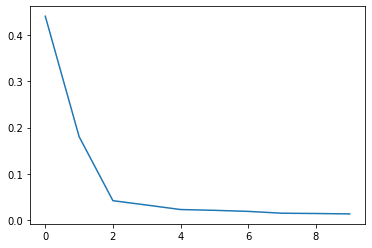

In [ ]:
# Plot the explained variance ratio
plt.plot(pipe.steps[1][1].explained_variance_ratio_)

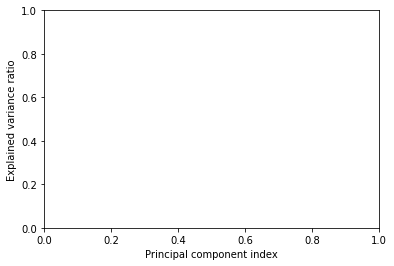

In [ ]:
plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.show()